In [3]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 115.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 17.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
 

In [4]:
import yfinance as yf
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = yf.download("MANU", start="2017-12-20", end="2022-12-20")
data_1 = yf.download("AJAX.AS", start="2017-12-20", end="2022-12-20")
data_2 = yf.download("OLG.PA", start="2017-12-20", end="2022-12-20")
data_3 = yf.download("BVB.DE", start="2017-12-20", end="2022-12-20")
data_4 = yf.download("JUVE.MI", start="2017-12-20", end="2022-12-20")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-20,20.450001,21.000000,20.400000,20.900000,19.892118,59000
2017-12-21,20.900000,21.350000,20.650000,21.150000,20.130062,56400
2017-12-22,21.150000,21.150000,20.299999,20.299999,19.321053,34100
2017-12-26,20.250000,20.450001,20.049999,20.200001,19.225878,16300
2017-12-27,20.299999,20.400000,20.100000,20.200001,19.225878,14100
...,...,...,...,...,...,...
2022-12-13,20.680000,21.150000,20.290001,20.680000,20.680000,1244800
2022-12-14,20.740000,21.610001,20.740000,21.590000,21.590000,1102100
2022-12-15,21.049999,21.770000,20.719999,21.620001,21.620001,1260200


In [8]:
data.describe

<bound method NDFrame.describe of                  Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2017-12-20  20.450001  21.000000  20.400000  20.900000  19.892118    59000
2017-12-21  20.900000  21.350000  20.650000  21.150000  20.130062    56400
2017-12-22  21.150000  21.150000  20.299999  20.299999  19.321053    34100
2017-12-26  20.250000  20.450001  20.049999  20.200001  19.225878    16300
2017-12-27  20.299999  20.400000  20.100000  20.200001  19.225878    14100
...               ...        ...        ...        ...        ...      ...
2022-12-13  20.680000  21.150000  20.290001  20.680000  20.680000  1244800
2022-12-14  20.740000  21.610001  20.740000  21.590000  21.590000  1102100
2022-12-15  21.049999  21.770000  20.719999  21.620001  21.620001  1260200
2022-12-16  21.520000  21.910000  21.400000  21.850000  21.850000  1428000
2022-12-19  21.490000  21.850000  20.980000  21.270000  21.270000 

In [9]:
data['daily_returns']=(data['Close'].pct_change())*100
data_1['daily_returns']=(data_1['Close'].pct_change())*100
data_2['daily_returns']=(data_2['Close'].pct_change())*100
data_3['daily_returns']=(data_3['Close'].pct_change())*100
data_4['daily_returns']=(data_4['Close'].pct_change())*100

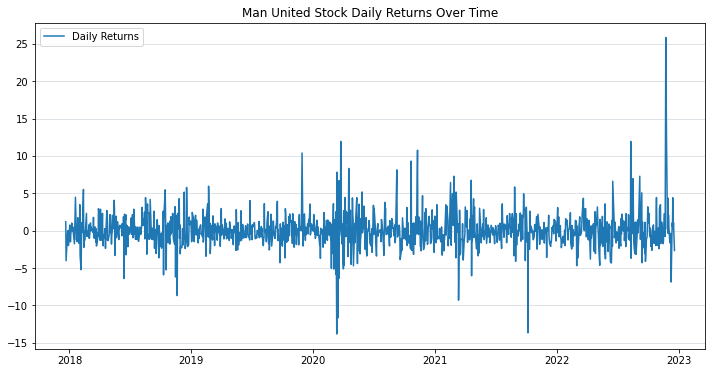

In [10]:
data.dropna(inplace=True)
fig,ax=plt.subplots(figsize=(12,6))
ax.grid(which="major", axis='y', color='#758D99', alpha=0.3, zorder=1)
plt.plot(data['daily_returns'], label = 'Daily Returns')
plt.legend(loc='best')
plt.title('Man United Stock Daily Returns Over Time')
plt.show()

In [12]:
ADJ =  data['Adj Close']
ADJ.describe().round(2)

count    1257.00
mean       16.59
std         2.68
min        10.51
25%        14.67
50%        16.31
75%        18.56
max        25.05
Name: Adj Close, dtype: float64

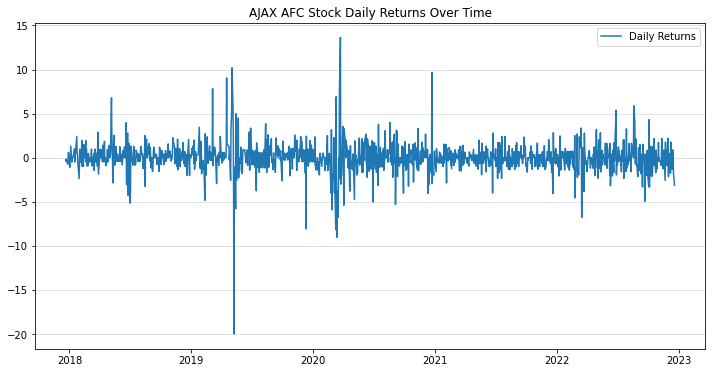

In [11]:
data_1.dropna(inplace=True)
fig,ax=plt.subplots(figsize=(12,6))
ax.grid(which="major", axis='y', color='#758D99', alpha=0.3, zorder=1)
plt.plot(data_1['daily_returns'], label = 'Daily Returns')
plt.legend(loc='best')
plt.title('AJAX AFC Stock Daily Returns Over Time')
plt.show()

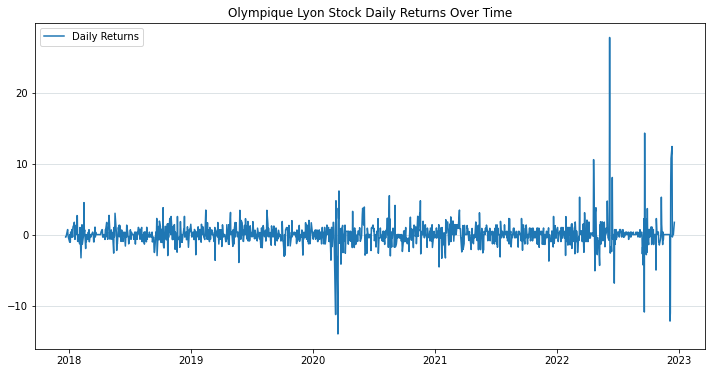

In [29]:
data_2.dropna(inplace=True)
fig,ax=plt.subplots(figsize=(12,6))
ax.grid(which="major", axis='y', color='#758D99', alpha=0.3, zorder=1)
plt.plot(data_2['daily_returns'], label = 'Daily Returns')
plt.legend(loc='best')
plt.title('Olympique Lyon Stock Daily Returns Over Time')
plt.show()

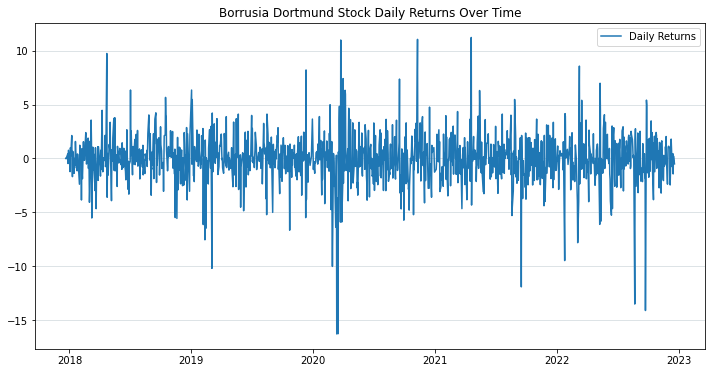

In [30]:
data_3.dropna(inplace=True)
fig,ax=plt.subplots(figsize=(12,6))
ax.grid(which="major", axis='y', color='#758D99', alpha=0.3, zorder=1)
plt.plot(data_3['daily_returns'], label = 'Daily Returns')
plt.legend(loc='best')
plt.title('Borrusia Dortmund Stock Daily Returns Over Time')
plt.show()

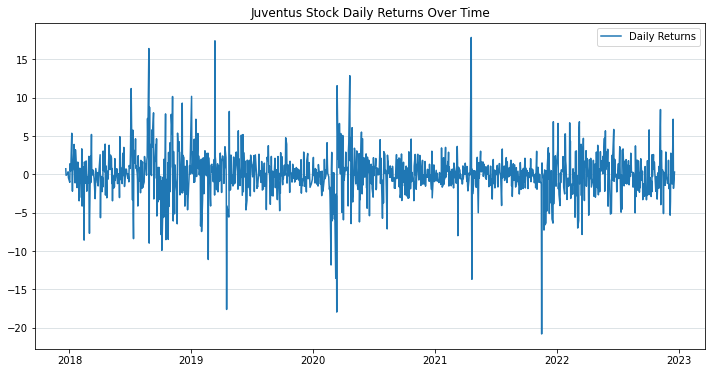

In [31]:
data_4.dropna(inplace=True)
fig,ax=plt.subplots(figsize=(12,6))
ax.grid(which="major", axis='y', color='#758D99', alpha=0.3, zorder=1)
plt.plot(data_4['daily_returns'], label = 'Daily Returns')
plt.legend(loc='best')
plt.title('Juventus Stock Daily Returns Over Time')
plt.show()

In [45]:
import math
daily_volatility_data = data['daily_returns'].std()
daily_volatility_data_1 = data_1['daily_returns'].std()
daily_volatility_data_2 = data_2['daily_returns'].std()
daily_volatility_data_3 = data_3['daily_returns'].std()
daily_volatility_data_4 = data_4['daily_returns'].std()
print('Daily volatility:')
print('Man United: ', '{:.2f}% '.format(daily_volatility_data))
print('AJAX AFC: ', '{:.2f}% '.format(daily_volatility_data_1))
print('OL Lyon: ', '{:.2f}% '.format(daily_volatility_data_2))
print('Dortmund: ', '{:.2f}% '.format(daily_volatility_data_3))
print('Juventus: ', '{:.2f}% \n '.format(daily_volatility_data_4))

monthly_volatility_data = math.sqrt(21) * daily_volatility_data
monthly_volatility_data_1 = math.sqrt(21) * daily_volatility_data_1
monthly_volatility_data_2 = math.sqrt(21) * daily_volatility_data_2
monthly_volatility_data_3 = math.sqrt(21) * daily_volatility_data_3
monthly_volatility_data_4 = math.sqrt(21) * daily_volatility_data_4
print('Monthly volatility:')
print ('Man United: ', '{:.2f}%'.format(monthly_volatility_data))
print ('AJAX AFC: ', '{:.2f}%'.format(monthly_volatility_data_1))
print ('OL Lyon: ', '{:.2f}%'.format(monthly_volatility_data_2))
print ('Dortmund: ', '{:.2f}%'.format(monthly_volatility_data_3))
print ('Juventus: ', '{:.2f}% \n '.format(monthly_volatility_data_4))

annual_volatility_data = math.sqrt(252) * daily_volatility_data
annual_volatility_data_1 = math.sqrt(252) * daily_volatility_data_1
annual_volatility_data_2 = math.sqrt(252) * daily_volatility_data_2
annual_volatility_data_3 = math.sqrt(252) * daily_volatility_data_3
annual_volatility_data_4 = math.sqrt(252) * daily_volatility_data_4
print('Annual volatility:')
print ('Man United: ', '{:.2f}%'.format(annual_volatility_data ))
print ('AJAX AFC: ', '{:.2f}%'.format(annual_volatility_data_1))
print ('OL Lyon: ', '{:.2f}%'.format(annual_volatility_data_2))
print ('Dortmund: ', '{:.2f}%'.format(annual_volatility_data_3))
print ('Juventus: ', '{:.2f}% \n '.format(annual_volatility_data_4))

Daily volatility:
Man United:  2.34% 
AJAX AFC:  1.71% 
OL Lyon:  1.81% 
Dortmund:  2.35% 
Juventus:  2.91% 
 
Monthly volatility:
Man United:  10.71%
AJAX AFC:  7.86%
OL Lyon:  8.31%
Dortmund:  10.78%
Juventus:  13.32% 
 
Annual volatility:
Man United:  37.12%
AJAX AFC:  27.22%
OL Lyon:  28.78%
Dortmund:  37.33%
Juventus:  46.15% 
 


In [49]:
!pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 907.3/907.3 KB 22.3 MB/s eta 0:00:00


In [56]:
from arch import arch_model
from arch.__future__ import reindexing

garch_model = arch_model(data['daily_returns'], p = 1, q = 1,
                      mean = 'constant', vol = 'GARCH', dist = 'normal')
garch_model_1 = arch_model(data_1['daily_returns'], p = 1, q = 1,
                      mean = 'constant', vol = 'GARCH', dist = 'normal')
garch_model_2 = arch_model(data_2['daily_returns'], p = 1, q = 1,
                      mean = 'constant', vol = 'GARCH', dist = 'normal')
garch_model_3 = arch_model(data_3['daily_returns'], p = 1, q = 1,
                      mean = 'constant', vol = 'GARCH', dist = 'normal')
garch_model_4 = arch_model(data_4['daily_returns'], p = 1, q = 1,
                      mean = 'constant', vol = 'GARCH', dist = 'normal')

gm_result = garch_model.fit(disp='off')
gm_result_1 = garch_model_1.fit(disp='off')
gm_result_2 = garch_model_2.fit(disp='off')
gm_result_3 = garch_model_3.fit(disp='off')
gm_result_4 = garch_model_4.fit(disp='off')
print("Man United")
print(gm_result.params)
print("Ajax AFC")
print(gm_result_1.params)
print("OL Lyon")
print(gm_result_2.params)
print("Dortmund")
print(gm_result_3.params)
print("Juventus")
print(gm_result_4.params)

print('\n')

gm_forecast = gm_result.forecast(horizon = 5)
print(gm_forecast.variance[-1:])

Man United
mu          0.013991
omega       0.431330
alpha[1]    0.122061
beta[1]     0.799848
Name: params, dtype: float64
Ajax AFC
mu          0.035207
omega       0.468786
alpha[1]    0.217934
beta[1]     0.612525
Name: params, dtype: float64
OL Lyon
mu         -0.016864
omega       0.020001
alpha[1]    0.053138
beta[1]     0.946862
Name: params, dtype: float64
Dortmund
mu          0.008512
omega       1.142466
alpha[1]    0.110068
beta[1]     0.680867
Name: params, dtype: float64
Juventus
mu         -0.006747
omega       2.244230
alpha[1]    0.314381
beta[1]     0.472089
Name: params, dtype: float64


                 h.1       h.2       h.3       h.4       h.5
Date                                                        
2022-12-19  9.015432  8.742736  8.491336  8.259568  8.045899


Text(0.5, 1.0, 'Man United Rolling Prediction')

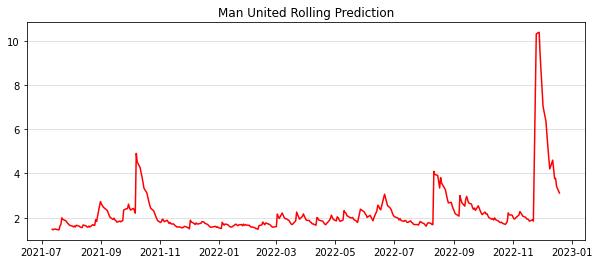

In [76]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = data['daily_returns'][:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=data['daily_returns'].index[-365:])

fig,ax = plt.subplots(figsize=(10,4))
ax.grid(which="major", axis='y', color='#758D99', alpha=0.3, zorder=1)
plt.plot(rolling_predictions, color= 'red')
plt.title('Man United Rolling Prediction')

Text(0.5, 1.0, 'Ajax AFC Rolling Prediction')

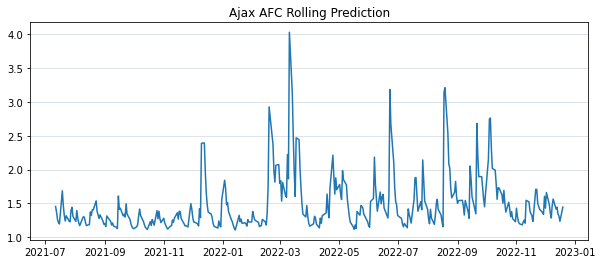

In [60]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = data_1['daily_returns'][:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=data['daily_returns'].index[-365:])

fig,ax = plt.subplots(figsize=(10,4))
ax.grid(which="major", axis='y', color='#758D99', alpha=0.3, zorder=1)
plt.plot(rolling_predictions)
plt.title('Ajax AFC Rolling Prediction')

/usr/local/lib/python3.8/dist-packages/arch/univariate/base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Text(0.5, 1.0, 'OL Lyon Rolling Prediction')

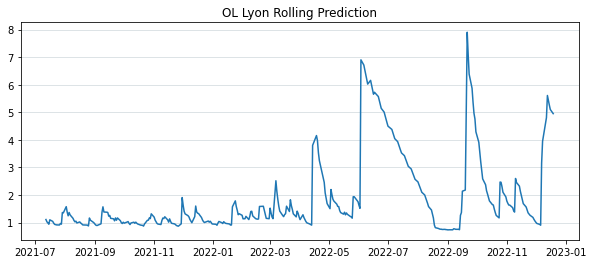

In [61]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = data_2['daily_returns'][:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=data['daily_returns'].index[-365:])

fig,ax = plt.subplots(figsize=(10,4))
ax.grid(which="major", axis='y', color='#758D99', alpha=0.3, zorder=1)
plt.plot(rolling_predictions)
plt.title('OL Lyon Rolling Prediction')

Text(0.5, 1.0, 'Dortmund Rolling Prediction')

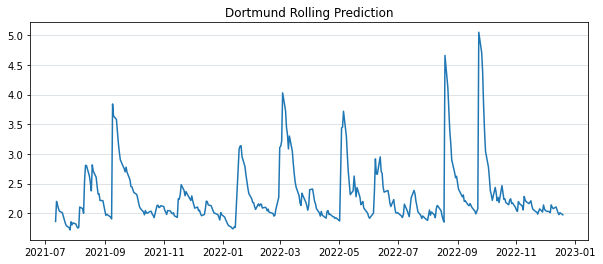

In [62]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = data_3['daily_returns'][:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=data['daily_returns'].index[-365:])

fig,ax = plt.subplots(figsize=(10,4))
ax.grid(which="major", axis='y', color='#758D99', alpha=0.3, zorder=1)
plt.plot(rolling_predictions)
plt.title('Dortmund Rolling Prediction')

Text(0.5, 1.0, 'Juventus Rolling Prediction')

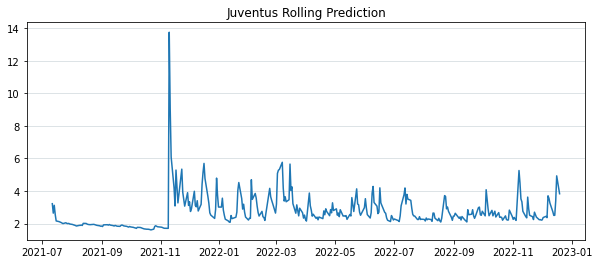

In [63]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = data_4['daily_returns'][:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=data['daily_returns'].index[-365:])

fig,ax = plt.subplots(figsize=(10,4))
ax.grid(which="major", axis='y', color='#758D99', alpha=0.3, zorder=1)
plt.plot(rolling_predictions)
plt.title('Juventus Rolling Prediction')

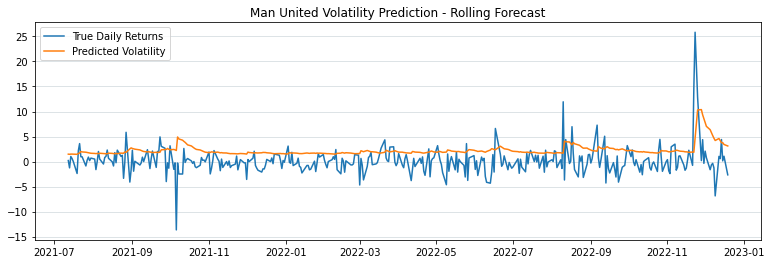

In [69]:
fig,ax = plt.subplots(figsize=(13,4))
ax.grid(which="major", axis='y', color='#758D99', alpha=0.3, zorder=1)
plt.plot(data['daily_returns'][-365:])
plt.plot(rolling_predictions)
plt.title('Man United Volatility Prediction - Rolling Forecast')
plt.legend(['True Daily Returns', 'Predicted Volatility'])

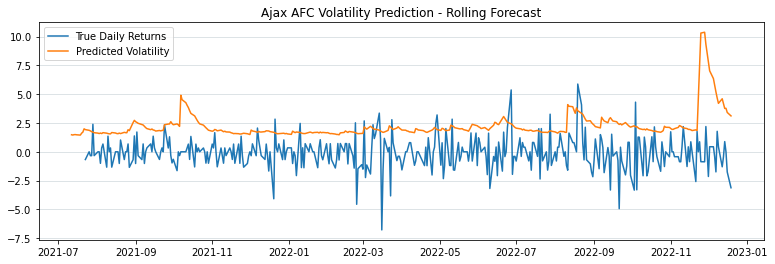

In [70]:
fig,ax = plt.subplots(figsize=(13,4))
ax.grid(which="major", axis='y', color='#758D99', alpha=0.3, zorder=1)
plt.plot(data_1['daily_returns'][-365:])
plt.plot(rolling_predictions)
plt.title('Ajax AFC Volatility Prediction - Rolling Forecast')
plt.legend(['True Daily Returns', 'Predicted Volatility'])

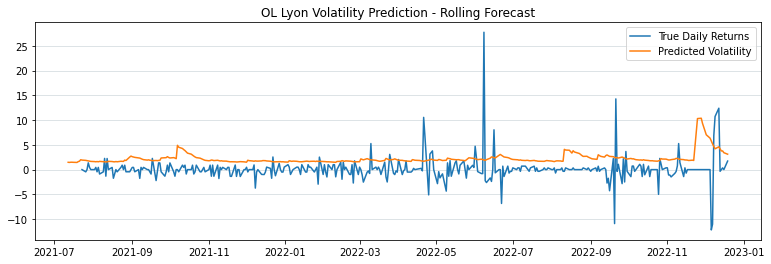

In [71]:
fig,ax = plt.subplots(figsize=(13,4))
ax.grid(which="major", axis='y', color='#758D99', alpha=0.3, zorder=1)
plt.plot(data_2['daily_returns'][-365:])
plt.plot(rolling_predictions)
plt.title('OL Lyon Volatility Prediction - Rolling Forecast')
plt.legend(['True Daily Returns', 'Predicted Volatility'])

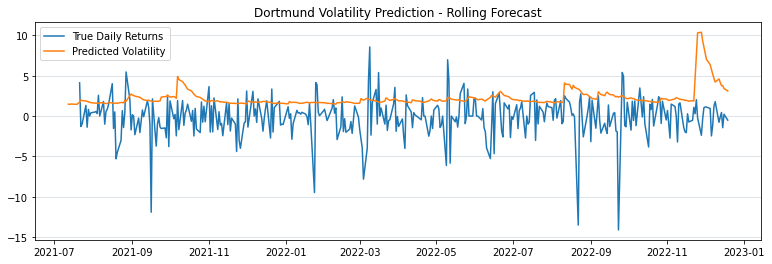

In [72]:
fig,ax = plt.subplots(figsize=(13,4))
ax.grid(which="major", axis='y', color='#758D99', alpha=0.3, zorder=1)
plt.plot(data_3['daily_returns'][-365:])
plt.plot(rolling_predictions)
plt.title('Dortmund Volatility Prediction - Rolling Forecast')
plt.legend(['True Daily Returns', 'Predicted Volatility'])

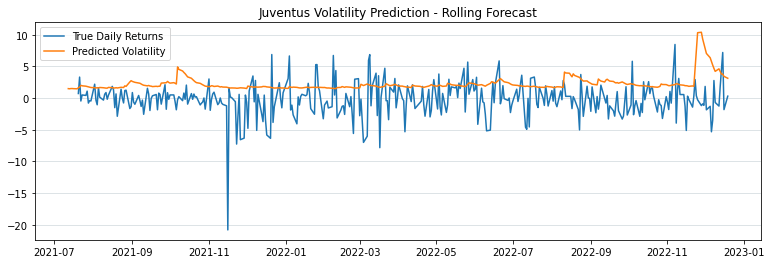

In [73]:
fig,ax = plt.subplots(figsize=(13,4))
ax.grid(which="major", axis='y', color='#758D99', alpha=0.3, zorder=1)
plt.plot(data_4['daily_returns'][-365:])
plt.plot(rolling_predictions)
plt.title('Juventus Volatility Prediction - Rolling Forecast')
plt.legend(['True Daily Returns', 'Predicted Volatility'])